In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
finalSeries = []

for i in range(2000,2017):
    filename = "data/data"+str(i)
    for j in range(1,13):
        filename = filename + "month" + str(j) +".csv"
        data = pd.read_csv(filename, usecols=['NO2 Mean'])
        series = data['NO2 Mean'].tolist()
        if(len(series)<31 and len(series)!=0):
            while len(series)!=31:
                last = series[len(series)-1]
                series.append(last)
        if(len(series)!=0):
            series.append(j)
            seriesNP = np.asarray(series)
            finalSeries.append(seriesNP)
        filename = "data/data"+str(i)

array([  8.      ,   7.458333,   5.291667,   6.875   ,  10.875   ,
        12.458333,  12.625   ,  13.166667,  13.136364,  15.      ,
        17.708333,  13.083333,  11.125   ,   9.875   ,  14.956522,
        16.416667,  15.666667,  10.5     ,   7.166667,   8.666667,
        17.086957,  19.833333,  22.25    ,  23.291667,  11.916667,
         8.458333,  15.291667,   9.583333,  12.913043,  14.958333,
        14.958333,   9.      ])

In [52]:
""""
for i in range(2000,2017):
    filename1 = "data/data"+str(i)
    for j in range(1,13):
        filename1 = filename1 + "month" + str(j) +".csv"
        data1 = pd.read_csv(filename1, usecols=['NO2 Mean'])
        series1 = data1['NO2 Mean'].tolist()
        if(len(series1)<31 and len(series1)!=0):
            while len(series1)!=31:
                last1 = series1[len(series1)-1]
                series1.append(last1)
        if(len(series1)!=0):
            series1.append(j)
            seriesNP1 = np.asarray(series1)
            finalSeries1.append(seriesNP1)
        filename1 = "data/data"+str(i)
""""

NameError: name 'finalSeries1' is not defined

In [5]:

finalSeriesNP = np.asarray(finalSeries)
print(finalSeriesNP)

[[ 15.208333  18.5       31.521739 ...,  28.083333  28.083333   1.      ]
 [ 27.        18.391304  20.       ...,  19.695652  19.695652   2.      ]
 [ 20.166667  25.958333  22.       ...,  14.333333  14.333333   3.      ]
 ..., 
 [ 19.633333  11.45       8.504167 ...,  11.075      4.333333   1.      ]
 [  2.058333  11.3       13.7875   ...,  11.869565  11.869565   2.      ]
 [ 11.925     11.7625    12.275    ...,   2.4625     9.25       3.      ]]


In [19]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
		
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [20]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [66]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data),num_clust)
    print(len(centroids))
    counter=0
    for n in range(num_iter):
        counter+=1
        print(counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
            
    #print(assignments)
    
    return centroids, assignments

In [61]:
dataForKMeans = finalSeriesNP[:,:-1]

4
1
2
3
4
5
6
7
8
9
10
{3: [1, 2, 10, 11, 0, 11, 0, 1, 10, 11, 0, 1, 9, 10, 11, 0, 1, 11, 11, 0, 1, 11, 10, 11, 1, 11, 0, 11, 0, 0], 0: [9, 1, 2, 3, 9, 10, 2, 9, 2, 7, 8, 2, 9, 10, 0, 1, 2, 10, 2, 9, 10, 0, 1, 2, 9, 0, 2, 10, 1, 0, 1, 10, 11, 9, 10, 11, 1, 9, 10, 11, 0, 10, 11, 9, 9, 10], 1: [5, 8, 4, 5, 7, 8, 3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 3, 5, 3, 4, 5, 9, 2, 3, 9, 10, 2, 9, 1, 2, 8, 2, 8, 1, 8, 9, 0, 4, 7, 8, 10, 11, 8, 11], 2: [7, 6, 4, 6, 7, 8, 6, 7, 8, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 1, 2, 3, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7, 0]}


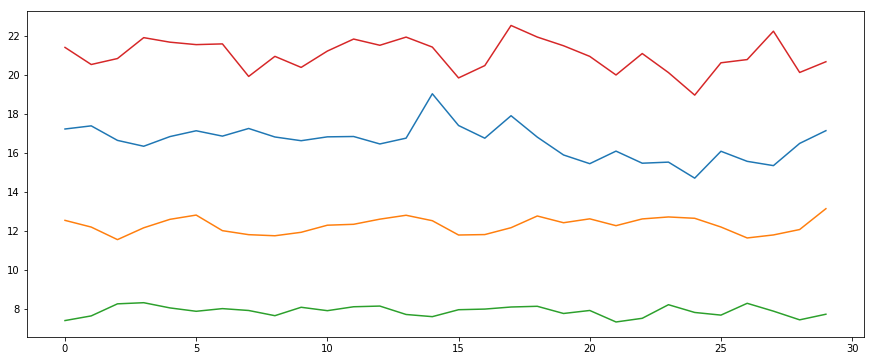

In [70]:
import matplotlib.pylab as plt

centroids, assignments = k_means_clust(dataForKMeans,4,10,4)

tempDict = {}
for k in assignments.keys():
    temp = []
    for i in assignments[k]:
        temp.append(i%12)
    tempDict[k] = temp
print(tempDict)
for i in centroids:
    
    plt.plot(i)

plt.show()
